In [ ]:
##Import Libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
##Load and Preprocess the Data

In [14]:
data = pd.read_csv("Alphabets_data.csv")

In [ ]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [15]:
print(data.shape)

(20000, 17)


In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [18]:
print(data.describe())

               xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

In [19]:
print(data.isnull().sum())

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [20]:
data = data.dropna()

In [21]:
data.rename(columns={data.columns[-1]: 'label'}, inplace=True)

In [22]:
X = data.drop('label', axis=1)

In [23]:
X

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5


In [24]:
y = data['label']

In [25]:
y

,label
0,8
1,10
2,9
3,8
4,10
...,...
19995,7
19996,7
19997,4
19998,8


In [26]:
le = LabelEncoder()

In [27]:
y_encoded = le.fit_transform(y)

In [28]:
scaler = StandardScaler()

In [29]:
X_numerical = X.select_dtypes(include=np.number)

In [32]:
X_scaled = scaler.fit_transform(X_numerical)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 15)
(4000, 15)
(16000,)
(4000,)


In [ ]:
##Build and Train a Simple ANN Model

In [35]:
model = Sequential()

In [36]:
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [43]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3396 - loss: 2.0162 - val_accuracy: 0.4691 - val_loss: 1.4124
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4733 - loss: 1.3710 - val_accuracy: 0.4931 - val_loss: 1.2871
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5216 - loss: 1.2591 - val_accuracy: 0.5322 - val_loss: 1.2217
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5410 - loss: 1.2092 - val_accuracy: 0.5453 - val_loss: 1.1777
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5564 - loss: 1.1833 - val_accuracy: 0.5634 - val_loss: 1.1493
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5622 - loss: 1.1507 - val_accuracy: 0.5659 - val_loss: 1.1228
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5869 - loss: 1.0979 - val_accuracy: 0.5678 - val_loss: 1.1095
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5841 - loss: 1.0922 - val_accuracy: 0.

In [ ]:
##Evaluate the Model

In [44]:
y_pred = np.argmax(model.predict(X_test), axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [45]:
print("Classification Report:\n")

Classification Report:



In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         6
           3       0.50      0.16      0.24        31
           4       0.53      0.43      0.47        94
           5       0.49      0.42      0.46       196
           6       0.48      0.51      0.49       353
           7       0.55      0.46      0.50       712
           8       0.71      0.83      0.77      1596
           9       0.49      0.44      0.46       485
          10       0.47      0.50      0.48       308
          11       0.61      0.54      0.57       175
          12       0.00      0.00      0.00        29
          13       1.00      0.11      0.20         9
          14       0.00      0.00      0.00         1

    accuracy                           0.61      4000
   macro avg       0.39      0.29      0.31      4000
weighted avg       0.59   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
##Plot Accuracy and Loss

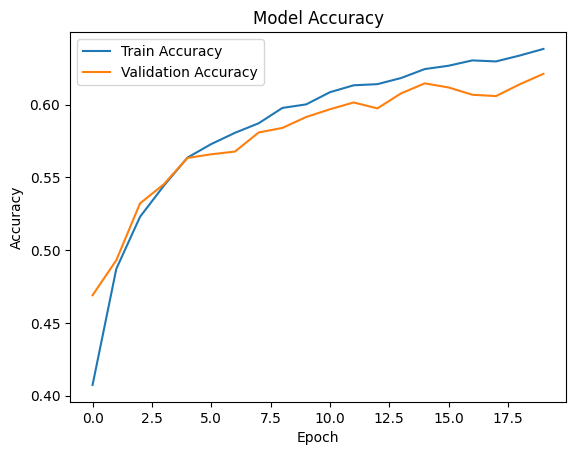

In [47]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [1]:
##Hyperparameter Tuning (Manual)

In [48]:
def build_model(units1, units2, activation):
    model = Sequential()
    model.add(Dense(units1, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(units2, activation=activation))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

results = []

In [49]:
model1 = build_model(64, 32, 'relu')
model1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
acc1 = model1.evaluate(X_test, y_test, verbose=0)[1]
results.append(("64-32 relu", acc1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model2 = build_model(128, 64, 'tanh')
model2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
acc2 = model2.evaluate(X_test, y_test, verbose=0)[1]
results.append(("128-64 tanh", acc2))


In [51]:
model3 = build_model(32, 16, 'relu')
model3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
acc3 = model3.evaluate(X_test, y_test, verbose=0)[1]
results.append(("32-16 relu", acc3))


In [52]:
for name, acc in results:
    print(f"{name} - Accuracy: {acc:.4f}")

64-32 relu - Accuracy: 0.5943
128-64 tanh - Accuracy: 0.6058
32-16 relu - Accuracy: 0.5548


In [53]:
##Evaluation of Best Model

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [55]:
y_pred = np.argmax(model2.predict(X_test), axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [56]:
print("Classification Report:\n")

Classification Report:



In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.17      0.25      0.20         4
           2       0.00      0.00      0.00         6
           3       0.44      0.13      0.20        31
           4       0.50      0.33      0.40        94
           5       0.47      0.42      0.45       196
           6       0.53      0.44      0.48       353
           7       0.49      0.57      0.52       712
           8       0.78      0.78      0.78      1596
           9       0.50      0.48      0.49       485
          10       0.43      0.57      0.49       308
          11       0.59      0.51      0.55       175
          12       0.44      0.14      0.21        29
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         1

    accuracy                           0.61      4000
   macro avg       0.36      0.31      0.32      4000
weighted avg       0.61   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


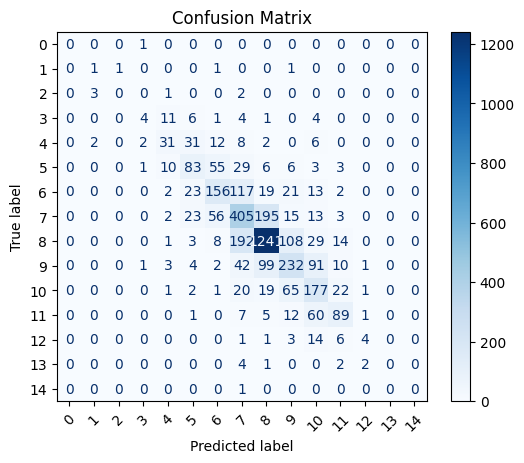

In [58]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()